# 1. Git

## 1.1 설치

* 클라이언트 설치
    * 리눅스
    
    ```
    sudo apt-get install git
    ```
    
    * 윈도우에서는 http://git-scm.org/downloads에 가서 설치

* 서버는 설치하지 않고 sign in
    * github.com 또는
    * bitbucket.com

* 클라이언트와 서버의 형상관리
    * 작업공간 (working directory)
        * 현재 작업을 하고 있는 공간. 보통 우리가 사용하고 있는 디렉토리.
        * git init을 해 놓은 디렉토리. 숨겨진 파일 '.git' 생성됨.
    * index
        * 형상관리 영역
        * 모든 변경내용이 추적 (track)
    * head
        * 클라이언트repo (또는 로컬repo). 서버repo(또는 원격repo)와 동기화가 이루어짐.
    * remote
        * 서버repo.
        * git remote add origin /path/to/url으로 등록해 놓은 경로.

## 1.2 개념

* 원격repo -> 작업공간 복사
    * git clone /path/to/repo

* 작업공간 -> index -> 로컬repo
    * git add 
    * git commit -m "messge"

* 로컬repo -> 원격repo 복사
    * git push origin master

* 이력/상태 보기
    * git log
    * git status

In [6]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [7]:
%load_ext plantuml_magics

The plantuml_magics extension is already loaded. To reload it, use:
  %reload_ext plantuml_magics


In [10]:
import glob
glob.glob(r'./*.jar')

['./plantuml.jar']

In [11]:
!which dot

/opt/local/bin/dot


* which dot의 결과가 /usr/bin/dot이면 아래 경로 지정을 할 필요 없슴.

In [12]:
import os
os.environ['GRAPHVIZ_DOT']='/opt/local/bin/dot'
print os.environ['GRAPHVIZ_DOT']
!java -jar plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


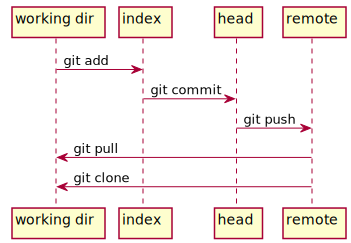

In [13]:
%%plantuml

@startuml

"working dir"->index:git add
index->head:git commit
head->remote:git push
remote->"working dir":git pull
remote->"working dir":git clone

@enduml

## 1.3 Create a new repository

### 1.3.1 회원가입

* github.com에서 회원가입(signup)
* 자신의 repository를 생성한다 (아래 myrepo)
* 생성한 후 명령어를 따라한다

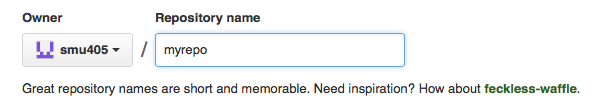

In [6]:
from IPython.display import Image
Image(filename='gitmyrepo.png')

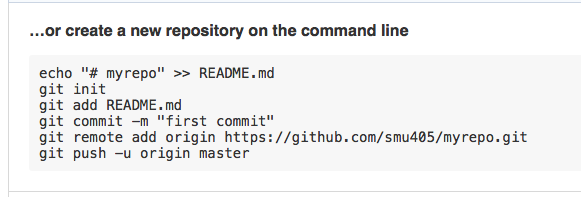

In [12]:
from IPython.display import Image
Image(filename='gitremoteaddorigin.png')

### 1.3.2 로컬에 형상관리 할 디렉토리 생성

* working directory 만듦
* 그리고 위 명령어를 하나씩 따라함

In [2]:
# create test dir under HOME directory
!mkdir myrepo
%cd myrepo

/Users/media/Dropbox/Me/toCopy/smu/intro/myrepo


In [3]:
# git init하고 나면 숨겨진 파일 .git가 생성됨.
!git init
!ls -la

Initialized empty Git repository in /Users/media/Dropbox/Me/toCopy/smu/intro/myrepo/.git/
total 0
drwxr-xr-x@  3 media  staff  102  9  4 15:32 .
drwxr-xr-x@  3 media  staff  102  9  4 15:32 ..
drwxr-xr-x@ 10 media  staff  340  9  4 15:32 .git


In [13]:
!echo "#my repo" >> README.md
!git add README.md
!git status

On branch master

Initial commit

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.gitignore



### 1.3.3 형상관리에서 제외

* .gitigonre파일을 생성하고 제외할 파일을 적어둔다
* 디렉토리 전체 (하위디렉토리 포함) -> /
* wildcards 사용가능
    ```
    classes/
    lib/
    model/*.png
    *.class
    *.jar
    *.swp
    *.html
    *.rar
    *.tar
    *.zip
    *.log
    ```
* 로컬에만 적용할 때는 최상위 디렉토리에 둔다
* 전체적으로 적용할 경우에는 다음과 같이 한다.
    ```
    $ git config –global core.excludesfile  .gitignore
    ```


In [14]:
!git add .gitignore
!git status

On branch master

Initial commit

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   .gitignore
	new file:   README.md



In [10]:
!cat .gitignore

classes/
src/*.class
src/*.*~
lib/
model/*.png

### 1.3.4 github에 올리기 위한 준비

* 앞서 git add명령어는 현재 작업디렉토리에서 인덱스 (index) 영역으로 올려놓은 것
* 여기서는 인덱스 영역에서 헤드(head) 영역으로 올려 놓음

In [15]:
!git commit -m 'first commit'
!git status

[master (root-commit) 36093aa] first commit
 2 files changed, 7 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 README.md
On branch master
nothing to commit, working directory clean


### 1.3.5 파일 원격으로 전송

* 원격 github.com/smu405/myrepo를 로컬(내컴퓨터)와 연동
* 파일을 전송 (git push)

In [16]:
!git remote add origin https://github.com/smu405/myrepo.git
!git push origin master

Counting objects: 4, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (4/4), 305 bytes | 0 bytes/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://github.com/smu405/myrepo.git
 * [new branch]      master -> master


## 1.4 다른 곳에 가서 - 처음

* 디렉토리를 만들고
* git clone

In [20]:
!mkdir myrepocopy
%cd myrepocopy
%pwd

/Users/media/Dropbox/Me/toCopy/smu
/Users/media/Dropbox/Me/toCopy/smu/myrepocopy


u'/Users/media/Dropbox/Me/toCopy/smu/myrepocopy'

In [21]:
!git clone https://github.com/smu405/myrepo.git

Cloning into 'myrepo'...
remote: Counting objects: 4, done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
Checking connectivity... done.


In [23]:
%cd myrepo
!ls -la

/Users/media/Dropbox/Me/toCopy/smu/myrepocopy/myrepo
total 16
drwxr-xr-x@  5 media  staff  170  9  4 16:29 .
drwxr-xr-x@  3 media  staff  102  9  4 16:29 ..
drwxr-xr-x@ 13 media  staff  442  9  4 16:29 .git
-rw-r--r--@  1 media  staff   46  9  4 16:29 .gitignore
-rw-r--r--@  1 media  staff   24  9  4 16:29 README.md


## 1.5 작업을 하고 나서

* git status
* git add
* git commit
* git push

In [24]:
!echo "# Modified by jsl" >> README.md
!git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

no changes added to commit (use "git add" and/or "git commit -a")


In [25]:
!git add README.md
!git commit -m "README updated"
!git push origin master

[master 51dee50] README updated
 1 file changed, 1 insertion(+)
Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 310 bytes | 0 bytes/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To https://github.com/smu405/myrepo.git
   36093aa..51dee50  master -> master


## 1.6 전에 작업을 했던 곳에서 이어 작업을 할 경우

* git log를 해보면 위에 다른 곳에서 작업했던 'README updated'가 없는 것을 알 수 있슴.
* 그렇다면 이 commit을 내려 받아 원격과 동기화시켜야 함!
* git status를 하여 현재 디렉토리에 원격과 다른 작업이 존재하는지 확인
* git pull
* 그 이후에는 작업을 함. 작업이 끝나면, 위 '3. 작업을 하고 나서'와 동일하게 함


In [28]:
%pwd

u'/Users/media/Dropbox/Me/toCopy/smu/intro/myrepo'

In [29]:
!git log

commit 36093aacd5586b73a8878fff9977147e23316ce2
Author: jslmac <jsl@mac>
Date:   Fri Sep 4 16:19:16 2015 +0900

    first commit


In [30]:
!git status

On branch master
nothing to commit, working directory clean


In [31]:
!git pull origin master

remote: Counting objects: 3, done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/smu405/myrepo
 * branch            master     -> FETCH_HEAD
   36093aa..51dee50  master     -> origin/master
Updating 36093aa..51dee50
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)


In [4]:
!ls -la

total 16
drwxr-xr-x@  5 media  staff  170  9  4 16:37 .
drwxr-xr-x@  3 media  staff  102  9  4 15:32 ..
drwxr-xr-x@ 15 media  staff  510  9  4 16:37 .git
-rw-r--r--@  1 media  staff   46  9  4 15:55 .gitignore
-rw-r--r--@  1 media  staff   42  9  4 16:37 README.md


## 1.7 그외

* 설정

    ```
    $ git config –global user.name “jsl”
    $ git config –global user.email jsl@example.com
    ```

* 원격저장소 설정 확인

    ```
    git remote -v
    ```

* 핸드폰 앱 설치하면 이동 중 확인 (bitbucket -> Bitbeaker 앱 설치)
* github webhook
    * 자신의 repo로 가서 (예: smu405/j2) 우측 settings를 클릭
    * 좌측 Webhooks & services > Services > Add service > Email > 그리고 알려줄 이메일 적어 넣음